In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
def calc_sec(time):
    hms = time.split(':')
    hms = [float(x) for x in hms]
    sec = hms[2] + hms[1]*60 + hms[0]*3600
    sec = round(sec,3)
    return sec

In [65]:
def calc_ts(sec):
    ts = ''
    hr = int(sec/3600)
    mn = int((sec - (hr*3600))/60)
    sc = sec - (hr*3600) - (mn*60)
    sc = round(sc,3)
    ts += str(hr) + ':' + str(mn) + ':' + str(sc)
    # print(ts)
    return ts

In [66]:
def calc_t_period(dates,secs):
    t_period = []
    
    start_sec = secs[0]
    prev_sec = secs[0]
    prev_date = dates[0]

    for i in range(len(secs)):
        curr_sec = secs[i]
        diff_sec = curr_sec - prev_sec
        curr_date = dates[i]
        
        if((diff_sec>3.0) and (curr_date==prev_date)):
            t_period.append([curr_date,start_sec,prev_sec])
            start_sec = curr_sec
        elif(curr_date!=prev_date):
            t_period.append([prev_date,start_sec,prev_sec])
            start_sec = curr_sec
            prev_date = curr_date
        elif(i==len(secs)-1):
            t_period.append([curr_date,start_sec,curr_sec])

        prev_sec = curr_sec
    
    return t_period

In [67]:
def equation_bai(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    diff_std = std_i**2 - std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
    diff_std_ = std_i**2

    all_std.append(diff_std)
    
    all_std = np.array(all_std)
    
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

In [68]:
std_i_bar = [0.00349329,0.00465817,0.00543154]
std_i_bar = np.array(std_i_bar)

In [69]:
filepath = 'SmartwatchData/raw_data/log_acc_19-12-18_RH.csv'
df = pd.read_csv(filepath)
filtered = [i for i in df['timestamp'] if i[:10]=='2018-12-19' and calc_sec(i[11:])>calc_sec('16:17:00') 
            and calc_sec(i[11:])<=calc_sec('16:37:33')]

df_filt = df[df['timestamp'].isin(filtered)]
df_filt = df_filt.reset_index(drop=True)

cols = ['timestamp','x','y','z']
df_filt = df_filt[cols]

df_filt

,timestamp,x,y,z
0,2018-12-19 16:17:00.045,8.718486,-1.756147,1.576582
1,2018-12-19 16:17:00.203,9.408015,-3.163938,0.293290
2,2018-12-19 16:17:00.398,9.671378,-2.110489,1.672350
3,2018-12-19 16:17:00.524,9.230844,-2.871845,1.313220
4,2018-12-19 16:17:00.685,9.230844,-2.852691,1.428141
5,2018-12-19 16:17:00.845,9.120711,-2.536657,1.495179
6,2018-12-19 16:17:01.006,9.139865,-2.407370,1.629254
7,2018-12-19 16:17:01.167,9.182961,-2.426523,1.701080
8,2018-12-19 16:17:01.328,9.221268,-2.474407,1.667562
9,2018-12-19 16:17:01.487,9.273940,-2.680309,1.519121


In [70]:
cols = df_filt.columns.tolist()

row_len = len(df_filt.index)

dates = [df_filt.iloc[i,0].split(' ')[0] for i in range(row_len)]
secs = [calc_sec(df_filt.iloc[i,0].split(' ')[1]) for i in range(row_len)]

period = calc_t_period(dates,secs)

ts = []
for elem in period:
    ts.append([elem[0],calc_ts(elem[1]),calc_ts(elem[2])])
    
ts = np.array(ts)
print(ts)

[['2018-12-19' '16:17:0.045' '16:37:32.659']]


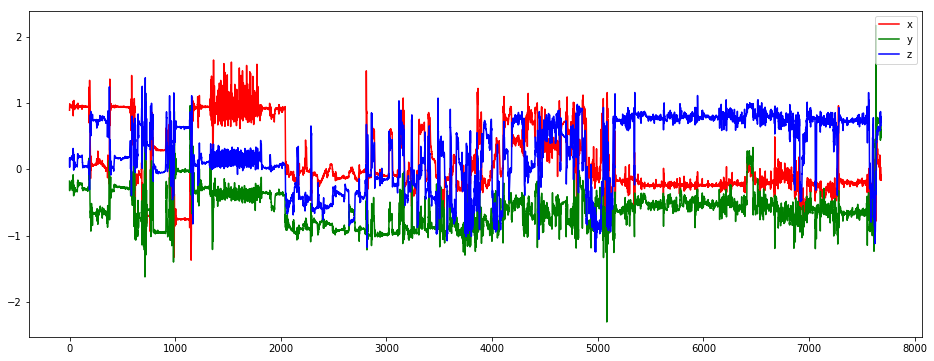

In [71]:
ts1 = [i for i in df_filt['timestamp'] if calc_sec(i[11:])<=calc_sec(ts[0][2])]
df1 = df_filt[df_filt['timestamp'].isin(ts1)]

g = 9.8
df1.loc[:,'x'] = df1['x'].apply(lambda x: x/g)
df1.loc[:,'y'] = df1['y'].apply(lambda x: x/g)
df1.loc[:,'z'] = df1['z'].apply(lambda x: x/g)

plotted = df1.plot(color=('r','g','b'),figsize=(16,6)).legend(loc='upper right')

fig = plotted.get_figure()
fig.savefig('testrun_indy_RH_acc.png')

In [72]:
H = 10
ai1 = []

for i in range(len(df1)):
    xyz_val = []
    if(i-H>=0):
        for j in range(H-1,0,-1):
            xyz_val.append([df1.iloc[i-j,1],df1.iloc[i-j,2],df1.iloc[i-j,3]])
        ai_val = float(equation_bai(xyz_val))
        ai1.append(ai_val)

In [73]:
ts = []
labels = []

with open('times.txt','r') as f:
    for line in f:
        t = line.strip('\n').split('\t')
        ts.append(round(float(t[0]),2))
        labels.append(t[1])

accum = 0
ts_ = []
for x in ts:
    accum += x
    ts_.append(accum)
    
print(ts_)
print()
print(labels)

secs = calc_sec('16:49:32.413')+1255.72
print(calc_ts(secs))

[41.1, 74.85, 108.99, 118.08999999999999, 152.98999999999998, 186.42, 227.07, 261.09, 284.22999999999996, 316.74999999999994, 324.7799999999999, 355.43999999999994, 402.0999999999999, 438.2499999999999, 485.9299999999999, 500.8899999999999, 516.8699999999999, 599.7699999999999, 704.5699999999998, 741.8699999999998, 772.6699999999997, 830.9699999999997, 874.1299999999997, 914.4399999999996, 946.7199999999996, 959.2199999999996, 977.5099999999995, 997.6399999999995, 1022.2199999999996, 1037.7499999999995, 1042.2499999999995, 1083.6699999999996, 1140.3999999999996, 1166.1799999999996, 1193.1499999999996, 1208.6799999999996, 1230.7199999999996, 1252.4699999999996, 1255.7199999999996]

['sit', 'stand', 'sit', 'NaN', 'stand', 'lay', 'sit', 'lay', 'NaN', 'sit', 'NaN', 'walk 1', 'walk 2', 'NaN', 'eat', 'drink', 'drink', 'NaN', 'teeth brush', 'NaN', 'comb', 'NaN', 'button up', 'unbutton', 'NaN', 'put on shorts', 'put off shorts', 'NaN', 'put on shorts sit', 'put off shorts sit', 'NaN', 'NaN', '

7683


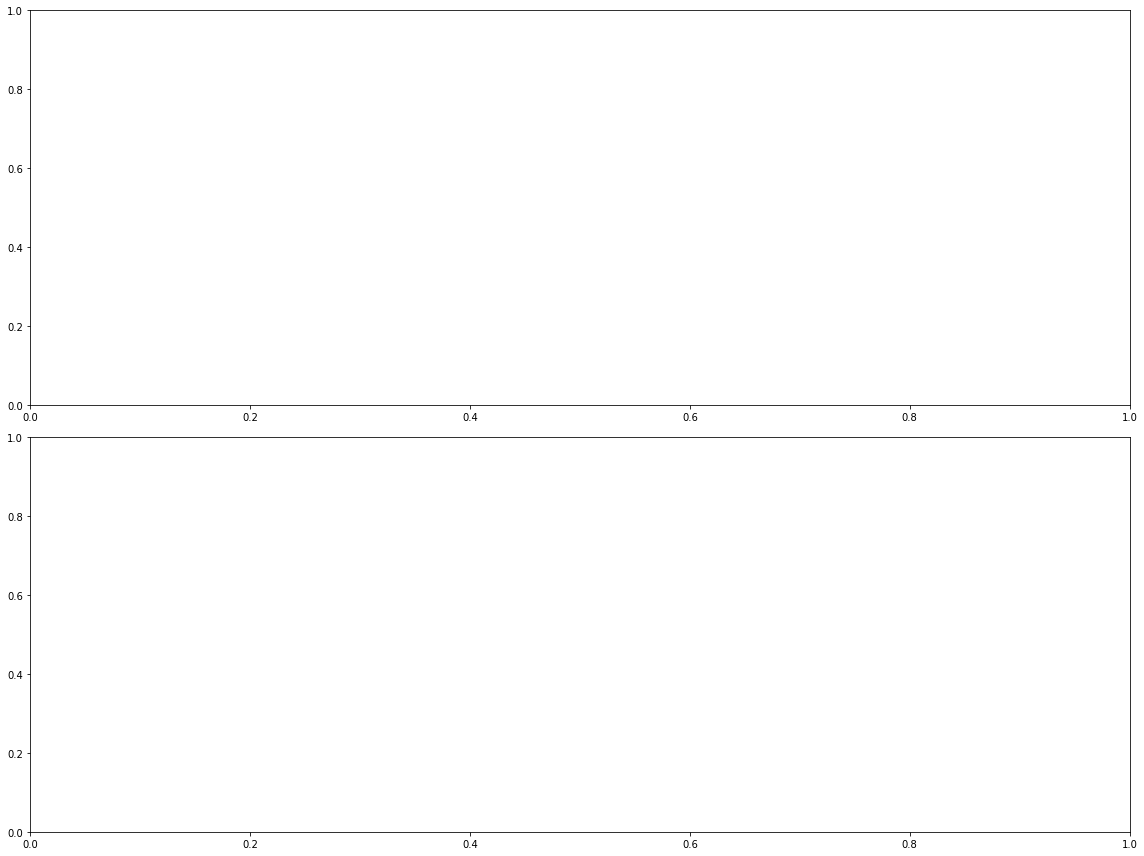

In [74]:
dict1 = df1.to_dict(orient='list')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12))
fig.tight_layout()

print(len(dict1['timestamp']))

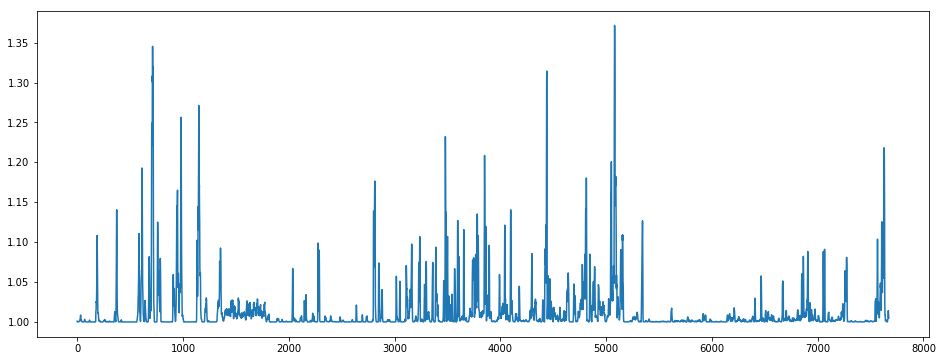

In [75]:
fig = plt.figure(figsize=(16,6))
plt.plot(ai1)
# plt.ylim(top=1.6)
plt.show()

fig.savefig('testrun_indy_RH_AI.png')

In [76]:
df1['AI'] = pd.Series(ai1)

df1.to_csv('SmartwatchData/raw_data/test_acc_indy_rh.csv')
df1

,timestamp,x,y,z,AI
0,2018-12-19 16:17:00.045,0.889641,-0.179199,0.160876,1.000946
1,2018-12-19 16:17:00.203,0.960002,-0.322851,0.029928,1.000276
2,2018-12-19 16:17:00.398,0.986875,-0.215356,0.170648,1.000135
3,2018-12-19 16:17:00.524,0.941923,-0.293045,0.134002,1.000109
4,2018-12-19 16:17:00.685,0.941923,-0.291091,0.145729,1.000047
5,2018-12-19 16:17:00.845,0.930685,-0.258843,0.152569,1.000046
6,2018-12-19 16:17:01.006,0.932639,-0.245650,0.166250,1.000047
7,2018-12-19 16:17:01.167,0.937037,-0.247604,0.173580,1.000046
8,2018-12-19 16:17:01.328,0.940946,-0.252491,0.170159,1.000160
9,2018-12-19 16:17:01.487,0.946320,-0.273501,0.155012,1.000132


In [77]:
ts2 = [i for i in df_filt['timestamp'] if calc_sec(i[11:])<=calc_sec(ts[1][2])]
df2 = df_filt[df_filt['timestamp'].isin(ts2)]

g = 9.8
df2.loc[:,'x'] = df2['x'].apply(lambda x: x/g)
df2.loc[:,'y'] = df2['y'].apply(lambda x: x/g)
df2.loc[:,'z'] = df2['z'].apply(lambda x: x/g)

df2.plot(color=('r','g','b'),figsize=(16,6)).legend(loc='upper right')

TypeError: 'float' object is not subscriptable

In [ ]:
H = 10
ai2 = []

for i in range(len(df2)):
    xyz_val = []
    if(i-H>=0):
        for j in range(H-1,0,-1):
            xyz_val.append([df2.iloc[i-j,1],df2.iloc[i-j,2],df2.iloc[i-j,3]])
        ai_val = equation_bai(xyz_val)
        ai2.append(ai_val)

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(ai2)
plt.ylim(top=1.6)
plt.show()